# Simulated Annealing

## 1. Introduction

Simulated annealing is a probabilistic optimization technique inspired by the metallurgical process of annealing, where metals are heated and then slowly cooled to reduce defects and reach a low-energy crystalline state. In optimization, this concept is adapted to escape local optima and search for global optima in complex solution spaces.

The algorithm works by:
1. **Accepting improvements**: Solutions that improve the objective function are always accepted
2. **Probabilistically accepting worse solutions**: Solutions that worsen the objective may still be accepted with a probability that depends on:
   - How much worse the solution is (delta)
   - The current "temperature" of the system
3. **Cooling schedule**: The temperature gradually decreases over time, making the algorithm less likely to accept worse solutions as optimization progresses

This probabilistic acceptance of worse solutions allows the algorithm to:
- Escape local optima
- Explore the solution space more thoroughly
- Potentially find better global solutions than pure hill climbing

The acceptance probability is typically calculated using the Boltzmann distribution: **P(accept) = exp(Δ / T)**, where Δ is the change in objective value and T is the temperature.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## 2. Acceptance probability, delta and temperature

The decision function below implements the core acceptance probability calculation for simulated annealing. It determines whether to accept a solution that doesn't improve the objective value.

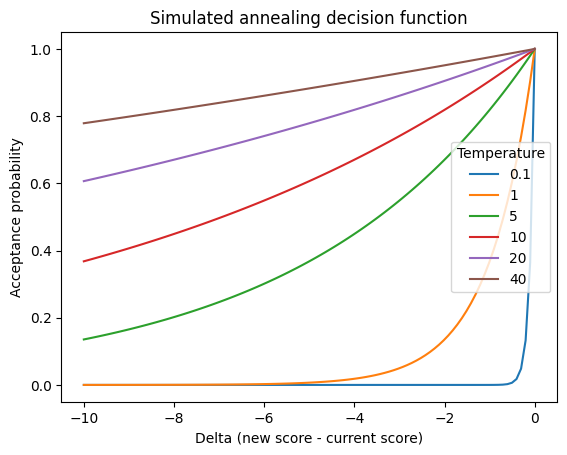

In [2]:
def decision_function(delta, temp):
    '''Calculate acceptance probability for simulated annealing.
    
    Args:
        delta: Difference between new and current objective values
        temp: Current temperature
        
    Returns:
        Acceptance probability (float)
    '''
    return np.exp(delta / temp)

deltas = np.linspace(-10, 0, 100)
temps = [0.1, 1, 5, 10, 20, 40]

plt.title('Simulated annealing decision function')

for temp in temps:
    plt.plot(deltas, decision_function(deltas, temp), label=temp)
    plt.xlabel('Delta (new score - current score)')
    plt.ylabel('Acceptance probability')

plt.legend(title='Temperature')
plt.show()

The plot above visualizes how temperature affects the acceptance probability for solutions that worsen the objective function.

### Key Observations:

1. **Delta (x-axis)**: Represents the change in objective value (new - current). Negative values mean the new solution is worse than the current one.

2. **Acceptance Probability (y-axis)**: The likelihood of accepting a worse solution.

3. **Temperature Effects**:
   - **High temperature (e.g., 40)**: The curve is nearly flat, meaning even very bad solutions (large negative deltas) have a significant chance of being accepted. This promotes exploration.
   - **Low temperature (e.g., 0.1)**: The curve drops sharply, meaning only slightly worse solutions have any meaningful chance of acceptance. This promotes exploitation.
   - **Medium temperatures**: Provide a balance between exploration and exploitation.

4. **As delta approaches 0**: All curves approach an acceptance probability of 1.0, meaning solutions that are only marginally worse are nearly always accepted.

## 3. Implementation in this project

In the HillClimber class, simulated annealing is implemented as follows:

1. **Temperature initialization**: Set via the `temperature` parameter (0 disables simulated annealing)
2. **Acceptance decision**: 
   - Calculate delta based on optimization mode (maximize/minimize/target)
   - Accept if delta ≥ 0 (improvement) OR with probability exp(delta/temperature)
3. **Cooling schedule**: Temperature is multiplied by `cooling_rate` after each iteration
4. **Convergence**: As temperature decreases, the algorithm becomes more selective, eventually behaving like pure hill climbing

This approach allows the optimizer to escape local optima early in the search (high temperature) while refining solutions later (low temperature), providing a good balance between global exploration and local exploitation.